In [17]:
def bresenham_line(x1, y1, x2, y2, darkness):
    
    """Generate points along a line using Bresenham's Line Algorithm."""
    points = []
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    x, y = x1, y1
    sx = -1 if x1 > x2 else 1
    sy = -1 if y1 > y2 else 1
    if dx > dy:
        err = dx / 2.0
        while x != x2:
            points.append(((x, y),darkness))
            err -= dy
            if err < 0:
                y += sy
                err += dx
            x += sx
    else:
        err = dy / 2.0
        while y != y2:
            points.append(((x, y), darkness))
            err -= dx
            if err < 0:
                x += sx
                err += dy
            y += sy        
    points.append(((x, y), darkness))

    return points




In [18]:
%pip install matplotlib numpy ffmpeg



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

n = 300  # Size of grid
r = 140  # Radius of circle (so that it fits well within the 10x10 grid)
num_nails = 8  # Number of nails

# Create grid
grid = np.zeros((n, n)) # Initialize with zeros for white background

# Center of the grid
center = [n//2, n//2]

# Calculate the positions of the nails
theta = np.linspace(0, 2.*np.pi, num_nails, endpoint=False)
x = center[0] + r * np.cos(theta)
y = center[1] + r * np.sin(theta)

nails = list(zip(np.round(x).astype(int), np.round(y).astype(int)))


In [20]:
   
def getDarkness(points, thickness):
    dir = [[1,0],[0,1],[-1,0],[0,-1]]
    np = {} # point, dark
    def dfs(point, dist, dark):
        if dist > thickness:
            return 
        if dark <= np[point]:
            return 
        
        np[point] = max(np.get(point, 0), dark)
        for a,b in dir:
            x = point[0] + a
            y = point[1] + b
            if 0 <= x < n and 0 <= y < n: # Ensure the dfs doesn't go out of grid
                dfs((x,y), dist+1, dark * 0.8) # 0.8 is decay factor for darkness

    for point, dark in points:
        dfs(point, 0, dark)
    
    points = []
    for point, dark in np.items():
        points.append((point, dark))

    return points

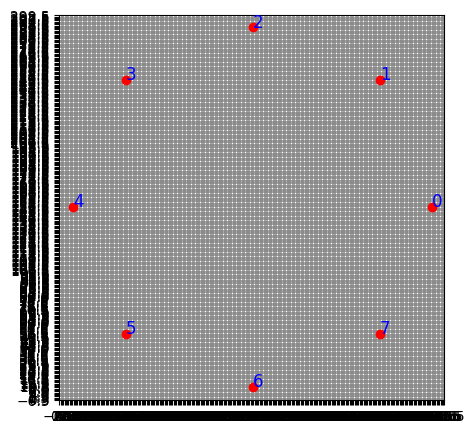

In [21]:
# Function to draw a line between two nails
def draw_line(nail1, nail2):
    thickness = 2
    darkness = .3
    # line_points = bresenham_line(nail1[0], nail1[1], nail2[0], nail2[1])
    # for point in line_points:
    #     grid[point[1], point[0]] = min(1, grid[point[1], point[0]] + 0.2)  # Increase value for darkness, cap at 1
    points = bresenham_line(nail1[0], nail1[1], nail2[0], nail2[1], darkness)
    line_points = getDarkness(points, thickness)
    for point in line_points:
        grid[point[0][1], point[0][0]] = min(1, grid[point[0][1],point[0][0]] + point[1])  # Increase value for darkness, cap at 1

# Create the base figure
fig, ax = plt.subplots(figsize=(5,5))

ax.set_xticks(np.arange(-0.5, n, 1)) # Offset by -0.5
ax.set_yticks(np.arange(-0.5, n, 1)) # Offset by -0.5
ax.grid(color='gray', linestyle='-', linewidth=0.5)

plt.xlim(-0.5, n-0.5)
plt.ylim(-0.5, n-0.5)
plt.gca().set_aspect('equal', adjustable='box')

# Plot the grid and nails initially
im = ax.imshow(grid, cmap='Greys', origin='lower', vmin=0, vmax=1)
for i, nail in enumerate(nails):
    ax.plot(*nail, 'ro')
    ax.text(nail[0], nail[1], str(i), color="blue", fontsize=12)



In [22]:
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

plt.rcParams['animation.html'] = 'html5'


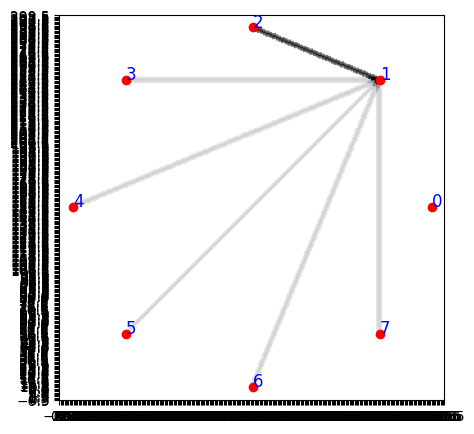

In [23]:
# Create the base figure
fig, ax = plt.subplots(figsize=(5,5))

ax.set_xticks(np.arange(-0.5, n, 1)) # Offset by -0.5
ax.set_yticks(np.arange(-0.5, n, 1)) # Offset by -0.5
# ax.grid(color='gray', linestyle='-', linewidth=0.5)

plt.xlim(-0.5, n-0.5)
plt.ylim(-0.5, n-0.5)
# plt.gca().set_aspect('equal', adjustable='box')

# Plot the grid and nails initially
im = ax.imshow(grid, cmap='Greys', origin='lower', vmin=0, vmax=1)
for i, nail in enumerate(nails):
    ax.plot(*nail, 'ro')
    ax.text(nail[0], nail[1], str(i), color="blue", fontsize=12)

# # Function to update the figure
# def update(i):
#     # Draw the line
#     draw_line(nails[1], nails[i])
    
#     # Update the image
#     im.set_array(grid)

# # Create the animation
# ani = animation.FuncAnimation(fig, update, frames=range(2, num_nails), interval=1000)

# # Display the animation
# HTML(ani.to_html5_video())

# draw_line(nails[1], nails[5])
# im.set_array(grid)


# get darkness values of grid
def poulateGridWithDarknessValues():
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            text = ax.text(j, i, round(grid[i, j], 2),
                            ha="center", va="center", color="r", size=8)

    im.set_array(grid)

